# US Air Transport Operation Analysis from 2009 to 2018
**Team 5A (Weijia Suo, Kexi Pi, Yipeng Guo, Yihan Jia, Ting-Hsuan Chen, Zheming Xu)**  

In [ ]:
# Connect to bigquery
from google.colab import auth
auth.authenticate_user()

## **Part 1: Project Description**

### **1.1 Project Objective**


As passengers, each of us experiences flight delays for various reasons at major airports. Even for popular airlines, large airports, they are not immune.

Through this project, we aimed to identify the most popular airlines and the busiest airports in the United States, then through different angles located in two main directions: airlines and airports, to better understand the operation of the aviation industry in the past ten years. After that, we give our suggestions to improve operational efficiency. 


###1.2 Motivation
Flight delay has always been a problem that the aviation industry has to face. We hope that through this analysis, we can look at the problem of flight delay from the two perspectives of airlines and airports. Through the comparison between airports and airlines, airlines and airlines to find out the direction of airlines and airports can be optimized, as well as the problems exposed.

### **1.2 Team Members** 

* Weijia Suo
* Kexi Pi
* Yipeng Guo
* Yihan Jia
* Ting-Hsuan Chen
* Zheming Xu

## **Part 2: Data Exploration**

### **2.1 Data Description**  
There are 3 main tables in our datasets: 
   
#### **flights**
Store time specific data for each flight from 2009 to 2018, such as departure time, arrival time, flight time, etc. Data comes from [Kaggle](https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018?select=2018.csv 
).  

The original data size is 61,556,964 rows and about 7GB, the data is stored separately by year. For example, flights_2009, flight_2010. 
  
#### **airports**

Store all airport information in the United States, such as geographic information, airport code, etc. Data comes from [Kaggle](https://www.kaggle.com/usdot/flight-delays?select=airports.csv).
  
#### **airlines**

Store all airlines information for `flights` datasets, such as geographic information, airport code, etc. Table are created by our team and data are comes from [airlinecodes.info](https://airlinecodes.info)
  

### **2.2 Data Preparation**


#### Step 1: Renaming and casting each flights table after uploading the original dataset

In [ ]:
%%bigquery --project ba775-team5
SELECT FLIGHT_DATE, IATA_CODE, FLIGHT_NUMBER, ORIGIN, DESTINATION, 
  CAST(SCHEDULED_DEPARTURE AS INT64 ) AS SCHEDULED_DEPARTURE, 
  CAST(DEPARTURE_TIME AS INT64) AS DEPARTURE_TIME, 
  CAST(DEPARTURE_DELAY AS INT64) AS DEPARTURE_DELAY, 
  CAST(TAXI_OUT AS INT64) as TAXI_OUT, 
  CAST(WHEELS_OFF AS INT64 ) AS WHEELS_OFF, 
  CAST(WHEELS_ON AS INT64 ) AS WHEELS_ON, 
  CAST(TAXI_IN AS INT64) as TAXI_IN, 
  CAST(SCHEDULED_ARRIVAL AS INT64 ) AS SCHEDULED_ARRIVAL, 
  CAST(ARRIVAL_TIME AS INT64 ) AS ARRIVAL_TIME,
  CAST(ARRIVAL_DELAY AS INT64 ) AS ARRIVAL_DELAY, 
  CAST(CANCELLED AS INT64 ) AS CANCELLED, CANCELLATION_CODE, 
  CAST(DIVERTED AS INT64) AS DIVERTED, 
  CAST(SCHEDULED_TIME AS INT64 ) AS SCHEDULED_TIME,
  CAST(ELAPSED_TIME AS INT64 ) AS ELAPSED_TIME, 
  CAST(AIR_TIME AS INT64 ) AS AIR_TIME, 
  CAST(DISTANCE AS INT64 ) AS DISTANCE, 
  CAST(CARRIER_DELAY AS INT64 ) AS CARRIER_DELAY, 
  CAST(WEATHER_DELAY AS INT64 ) AS WEATHER_DELAY, 
  CAST(NAS_DELAY AS INT64 ) AS NAS_DELAY,
  CAST(SECURITY_DELAY AS INT64 ) AS SECURITY_DELAY, 
  CAST(LATE_AIRCRAFT_DELAY AS INT64 ) AS LATE_AIRCRAFT_DELAY
FROM `ba775-team5.us_airlines.flight_2009`


#### Step 2: Combine all flights data and save to table `flights_all`

In [ ]:
%%bigquery --project ba775-team5
SELECT *
FROM `ba775-team5.us_airlines.flights_2009`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2010`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2011`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2012`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2013`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2014`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2015`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2016`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2017`
UNION ALL
SELECT *
FROM `ba775-team5.us_airlines.flights_2018`

Executing query with job ID: c2c93f15-ade9-4f2e-9c83-02adba854384
Query executing: 32.12s

#### Step 3: Find all company name via IATA_CODE and store them in `airlines` table

In [ ]:
%%bigquery --project ba775-team5
SELECT DISTINCT (IATA_CODE)
FROM `ba775-team5.us_airlines.flights_all`
LIMIT 10; -- Only for Preview

,IATA_CODE
0,OO
1,F9
2,OH
3,WN
4,YV
5,NW
6,XE
7,G4
8,CO
9,VX


####Step 4: Add timeslots and year period attribute

In [ ]:
%%bigquery --project ba775-team5
SELECT *, 
CASE 
    WHEN SCHEDULED_DEPARTURE >=0 and SCHEDULED_DEPARTURE < 200 THEN '1'
    WHEN SCHEDULED_DEPARTURE = 2400 THEN '1'  --filtering departure time into 12 time slots, 2 hours for each. Note that in 00:00-02:00, 00:00 is included but 02:00 is not included.
    WHEN SCHEDULED_DEPARTURE >= 200 AND SCHEDULED_DEPARTURE < 400 THEN '2'
    WHEN SCHEDULED_DEPARTURE >= 400 AND SCHEDULED_DEPARTURE < 600 THEN '3'
    WHEN SCHEDULED_DEPARTURE >= 600 AND SCHEDULED_DEPARTURE < 800 THEN '4'
    WHEN SCHEDULED_DEPARTURE >= 800 AND SCHEDULED_DEPARTURE < 1000 THEN '5'
    WHEN SCHEDULED_DEPARTURE >= 1000 AND SCHEDULED_DEPARTURE < 1200 THEN '6'
    WHEN SCHEDULED_DEPARTURE >= 1200 AND SCHEDULED_DEPARTURE < 1400 THEN '7'
    WHEN SCHEDULED_DEPARTURE >= 1400 AND SCHEDULED_DEPARTURE < 1600 THEN '8'
    WHEN SCHEDULED_DEPARTURE >= 1600 AND SCHEDULED_DEPARTURE < 1800 THEN '9'
    WHEN SCHEDULED_DEPARTURE >= 1800 AND SCHEDULED_DEPARTURE < 2000 THEN '10'
    WHEN SCHEDULED_DEPARTURE >= 2000 AND SCHEDULED_DEPARTURE < 2200 THEN '11'
    WHEN SCHEDULED_DEPARTURE >= 2200 AND SCHEDULED_DEPARTURE < 2400  THEN '12'
END AS SCHEDULED_TIMESLOT,
CASE 
    WHEN DEPARTURE_TIME >=0 and DEPARTURE_TIME < 200 THEN '1'  --filtering departure time into 12 time slots, 2 hours for each. Note that in 00:00-02:00, 00:00 is included but 02:00 is not included.
    WHEN DEPARTURE_TIME >= 200 AND DEPARTURE_TIME < 400 THEN '2'
    WHEN DEPARTURE_TIME >= 400 AND DEPARTURE_TIME < 600 THEN '3'
    WHEN DEPARTURE_TIME >= 600 AND DEPARTURE_TIME < 800 THEN '4'
    WHEN DEPARTURE_TIME >= 800 AND DEPARTURE_TIME < 1000 THEN '5'
    WHEN DEPARTURE_TIME >= 1000 AND DEPARTURE_TIME < 1200 THEN '6'
    WHEN DEPARTURE_TIME >= 1200 AND DEPARTURE_TIME < 1400 THEN '7'
    WHEN DEPARTURE_TIME >= 1400 AND DEPARTURE_TIME < 1600 THEN '8'
    WHEN DEPARTURE_TIME >= 1600 AND DEPARTURE_TIME < 1800 THEN '9'
    WHEN DEPARTURE_TIME >= 1800 AND DEPARTURE_TIME < 2000 THEN '10'
    WHEN DEPARTURE_TIME >= 2000 AND DEPARTURE_TIME < 2200 THEN '11'
    WHEN DEPARTURE_TIME >= 2200 AND DEPARTURE_TIME < 2400  THEN '12'
    WHEN DEPARTURE_TIME = 2400 THEN '1'
    END AS DEPARTURE_TIMESLOT,
CASE
     WHEN EXTRACT(YEAR from FLIGHT_DATE) = 2009 OR EXTRACT(YEAR from FLIGHT_DATE) = 2010 THEN '1'
     WHEN EXTRACT(YEAR from FLIGHT_DATE) = 2011 OR EXTRACT(YEAR from FLIGHT_DATE) = 2012 THEN '2'
     WHEN EXTRACT(YEAR from FLIGHT_DATE) = 2013 OR EXTRACT(YEAR from FLIGHT_DATE) = 2014 THEN '3'
     WHEN EXTRACT(YEAR from FLIGHT_DATE) = 2015 OR EXTRACT(YEAR from FLIGHT_DATE) = 2016 THEN '4'
     WHEN EXTRACT(YEAR from FLIGHT_DATE) = 2017 OR EXTRACT(YEAR from FLIGHT_DATE) = 2018 THEN '5'
     end as YEAR_PERIOD,
FROM `ba775-team5.us_airlines.flights`


### **2.3 Data Preview**

#### **2.3.1 Flights Table**


| Field name          | Type    | Mode     | Description                                                                                                |
|---------------------|---------|----------|------------------------------------------------------------------------------------------------------------|
| FLIGHT_DATE         | DATE    | NULLABLE | Date of the Flight Trip                                                                                    |
| IATA_CODE           | STRING  | NULLABLE | Airline Identifier                                                                                         |
| FLIGHT_NUMBER       | INTEGER | NULLABLE | Flight Identifier                                                                                          |
| ORIGIN              | STRING  | NULLABLE | Starting Airport                                                                                           |
| DESTINATION         | STRING  | NULLABLE | Destination Airport                                                                                        |
| SCHEDULED_DEPARTURE | INTEGER | NULLABLE | Planned Departure Time                                                                                     |
| DEPARTURE_TIME      | INTEGER | NULLABLE | WHEEL_OFF - TAXI_OUT                                                                                       |
| DEPARTURE_DELAY     | INTEGER | NULLABLE | Total Delay on Departure                                                                                   |
| TAXI_OUT            | INTEGER | NULLABLE | The time duration elapsed between departure from the origin airport gate and wheels off                    |
| WHEELS_OFF          | INTEGER | NULLABLE | The time point that the aircraft's wheels leave the ground                                                 |
| WHEELS_ON           | INTEGER | NULLABLE | The time point that the aircraft's wheels touch on the ground                                              |
| TAXI_IN             | INTEGER | NULLABLE | The time duration elapsed between wheels-on and gate arrival at the destination airport                    |
| SCHEDULED_ARRIVAL   | INTEGER | NULLABLE | Planned arrival time                                                                                       |
| ARRIVAL_TIME        | INTEGER | NULLABLE | WHEELS_ON+TAXI_IN                                                                                          |
| ARRIVAL_DELAY       | INTEGER | NULLABLE | ARRIVAL_TIME-SCHEDULED_ARRIVAL                                                                             |
| CANCELLED           | INTEGER | NULLABLE | Flight Cancelled (1 = cancelled)                                                                           |
| CANCELLATION_CODE   | STRING  | NULLABLE | Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security |
| DIVERTED            | INTEGER | NULLABLE | Aircraft landed on airport that out of schedule                                                            |
| SCHEDULED_TIME      | INTEGER | NULLABLE | Planned time amount needed for the flight trip                                                             |
| ELAPSED_TIME        | INTEGER | NULLABLE | AIR_TIME+TAXI_IN+TAXI_OUT                                                                                  |
| AIR_TIME            | INTEGER | NULLABLE | The time duration between wheels_off and wheels_on time                                                    |
| DISTANCE            | INTEGER | NULLABLE | Distance between two airports                                                                              |
| CARRIER_DELAY       | INTEGER | NULLABLE |                                                                                                            |
| WEATHER_DELAY       | INTEGER | NULLABLE |                                                                                                            |
| NAS_DELAY           | INTEGER | NULLABLE |                                                                                                            |
| SECURITY_DELAY      | INTEGER | NULLABLE |                                                                                                            |
| LATE_AIRCRAFT_DELAY | INTEGER | NULLABLE |                                                                                                            |

In [ ]:
%%bigquery --project ba775-team5
 SELECT *
 FROM `ba775-team5.us_airlines.flights_all`
 LIMIT 5

#### **2.3.2 Airports Table**


| Field name | Type   | Mode     | Description                 |
|------------|--------|----------|-----------------------------|
| IATA_CODE  | STRING | NULLABLE | Location Identifier         |
| AIRPORT    | STRING | NULLABLE | Airport's Name              |
| CITY       | STRING | NULLABLE |                             |
| STATE      | STRING | NULLABLE |                             |
| COUNTRY    | STRING | NULLABLE | Country Name of the Airport |
| LATITUDE   | FLOAT  | NULLABLE | Latitude of the Airport     |
| LONGITUDE  | FLOAT  | NULLABLE | Longitude of the Airport    |

In [ ]:
%%bigquery --project ba775-team5
 SELECT *
 FROM `ba775-team5.us_airlines.airports`

#### **2.3.3 Airlines Table**


| Field name | Type   | Mode     |
|------------|--------|----------|
| IATA_CODE  | STRING | NULLABLE |
| AIRLINE    | STRING | NULLABLE |

In [ ]:
%%bigquery --project ba775-team5
 SELECT *
 FROM `ba775-team5.us_airlines.airlines`
 LIMIT 5

## Part 3: Business Problems (Airlines)


###3.1 Top 5 US Airlines With The Most Flights in Past 10 Years

In this section, we calculate the TOP 5  airlines with the most flights. We want to look at the operations of these airlines and find some problems by comparing them with other airlines. These airlines have a higher volume of passengers, which means they are the airlines that have a higher impact on passengers.

In [ ]:
%%bigquery --project ba775-team5
SELECT A.IATA_CODE,  B.AIRLINE AS AIRLINE_NAME, COUNT(A.IATA_CODE) AS FLIGHT_COUNT,
FROM `ba775-team5.us_airlines.flights_all` AS A
JOIN
   `ba775-team5.us_airlines.airlines` AS B
 ON
   A.IATA_CODE = B.IATA_CODE
GROUP BY IATA_CODE, AIRLINE
ORDER BY FLIGHT_COUNT DESC
LIMIT 5


,IATA_CODE,AIRLINE_NAME,FLIGHT_COUNT
0,WN,Southwest Airlines Co.,12096540
1,DL,Delta Air Lines Inc.,7841880
2,AA,American Airlines Inc.,6682161
3,OO,Skywest Airlines Inc.,6263052
4,UA,United Air Lines Inc.,4826658


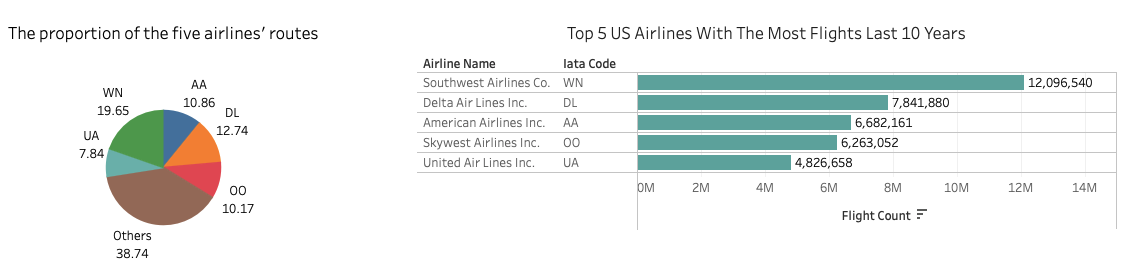

####**3.1.1 Results**
1. It can be seen from the data visualization that the airlines we selected have more than 60% of all domestic airlines in the United States, which means that the five airlines we selected have a great influence on passengers.
2. The visualization shows that the order is Southwest Airlines, Delta Airline, American Airlines, Skywest Airlines, and United Airlines.

###3.2 Top 5 Airlines' Cancellation Rate in Different Time Slots (2 yrs Per Slot)

Our goal is to calculate the number of cancellation codes for each airline to get the TOP 5 airlines with the highest cancellation rate. Our selection of Cancellation_Code = 'A' here means that cancellations are for airline company reasons only, excluding cancellations for other reasons such as weather. Through the results, we can see whether there is a problem with the airline's operation. We have 10 years of data originally, and to make the final results clear, We divide the 10 years into two-year groups to see which airlines have operating problems.


In [ ]:
%%bigquery --project ba775-team5
SELECT IATA_CODE, a.YEAR_PERIOD, (ROUND(Airlines_Cancel/Sum_Cancel, 4))*100 AS Cancel_Rate
FROM(
    SELECT COUNT(*) AS Sum_Cancel, YEAR_PERIOD,
    from `ba775-team5.us_airlines.flights_all`
    where CANCELLATION_CODE = 'A' AND IATA_CODE IN ('DL', 'AA', 'UA', 'OO', 'WN')
    GROUP BY YEAR_PERIOD 
) AS a JOIN 
(
    SELECT IATA_CODE, COUNT(*) AS Airlines_Cancel, YEAR_PERIOD,
    from `ba775-team5.us_airlines.flights_all`
    where CANCELLATION_CODE = 'A' AND IATA_CODE IN ('DL', 'AA', 'UA', 'OO', 'WN')
    GROUP BY IATA_CODE, YEAR_PERIOD 
) AS b ON a.YEAR_PERIOD = b.YEAR_PERIOD
ORDER BY IATA_CODE, YEAR_PERIOD
LIMIT 10; -- Only for Preview

,IATA_CODE,YEAR_PERIOD,Cancel_Rate
0,AA,1,20.60
1,AA,2,23.71
2,AA,3,14.72
3,AA,4,21.93
4,AA,5,30.73
5,DL,1,21.57
6,DL,2,10.90
7,DL,3,6.11
8,DL,4,9.56
9,DL,5,14.49


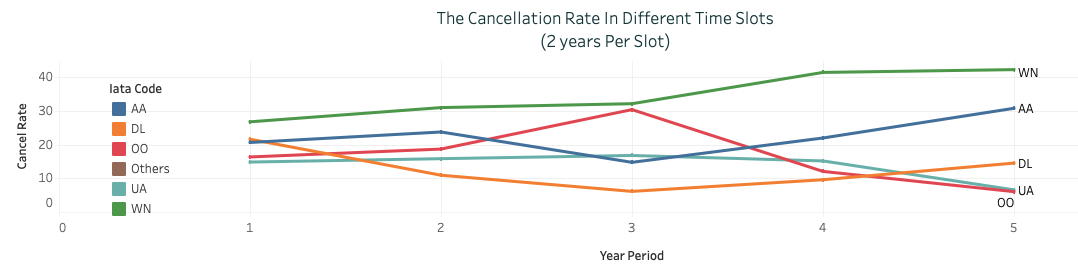

####**3.2.1 Results**
1. According to the visualization, we can see that the flight cancellation rates of WN, AA, and DL show an upward trend, while UA and OO show a downward trend. We will continue to analyze the number of flights per airline in 2 years' time slots to see if the delay rate is due to the lack of staff and equipment with the growth of flights.

###3.3 The Number of Flights for Each Airlines in Different Time Slots (2 yrs Per Slot)

In [ ]:
%%bigquery --project ba775-team5
SELECT IATA_CODE, COUNT(*) AS Sum_Flight, YEAR_PERIOD,
FROM `ba775-team5.us_airlines.flights_all`
WHERE IATA_CODE IN ('DL', 'AA', 'UA', 'OO', 'WN')
GROUP BY IATA_CODE, YEAR_PERIOD 
ORDER BY IATA_CODE, YEAR_PERIOD 
LIMIT 10; -- Only for Preview

,IATA_CODE,Sum_Flight,YEAR_PERIOD
0,AA,1091019,1
1,AA,1061909,2
2,AA,1075588,3
3,AA,1640479,4
4,AA,1813166,5
5,DL,1159009,1
6,DL,1456356,2
7,DL,1555045,3
8,DL,1798627,4
9,DL,1872843,5


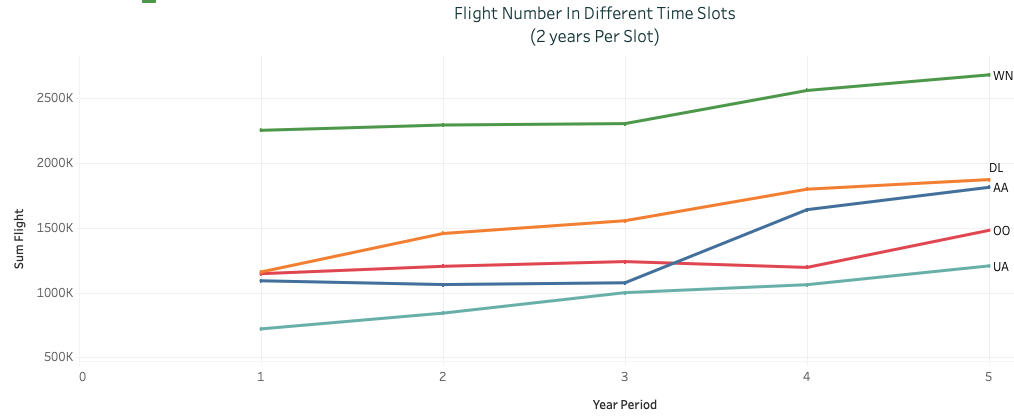

####**3.3.1 Results**
1. From this figure, it can be seen that the number of flights of these five airlines increased in the four periods of 3, 4 and 5 years. However, according to the result of 3.2, the cancellation rates of UA and OO are declining, while WN, DL and AA show an obvious increase, which confirms our previous conclusion: due to the rapid growth of flight volume, the shortage of personnel and equipment is caused


###3.4 The Number of Flights for Each Airlines During Different Time Slots (2 hrs per slot)

The target here is to spot the peak and trough time for the five airlines mentioned previously by dividing 24hrs into 12 time slots from ‘1’ to ‘12’. For example, ‘1’ stands for 00:00 to 02:00. 

In [ ]:
%%bigquery --project ba775-team5
SELECT F.IATA_CODE, AIRLINE, Number_of_flight, DEPARTURE_TIMESLOT
FROM (
    SELECT IATA_CODE, COUNT(*) AS Number_of_flight, DEPARTURE_TIMESLOT
    FROM `ba775-team5.us_airlines.flights_all` 
    WHERE IATA_CODE IN ('OO', 'WN', 'AA', 'DL', 'UA')
        AND DEPARTURE_TIME IS NOT NULL
    GROUP BY IATA_CODE, DEPARTURE_TIMESLOT
) AS f 
    JOIN `ba775-team5.us_airlines.airlines` AS a
    ON f.IATA_CODE = a.IATA_CODE
ORDER BY DEPARTURE_TIMESLOT
LIMIT 10 -- Only for Preview

,IATA_CODE,AIRLINE,Number_of_flight,DEPARTURE_TIMESLOT
0,UA,United Air Lines Inc.,37058,1
1,DL,Delta Air Lines Inc.,49847,1
2,AA,American Airlines Inc.,51486,1
3,OO,Skywest Airlines Inc.,6276,1
4,WN,Southwest Airlines Co.,13855,1
5,OO,Skywest Airlines Inc.,172,2
6,UA,United Air Lines Inc.,3501,2
7,WN,Southwest Airlines Co.,624,2
8,AA,American Airlines Inc.,1839,2
9,DL,Delta Air Lines Inc.,2523,2


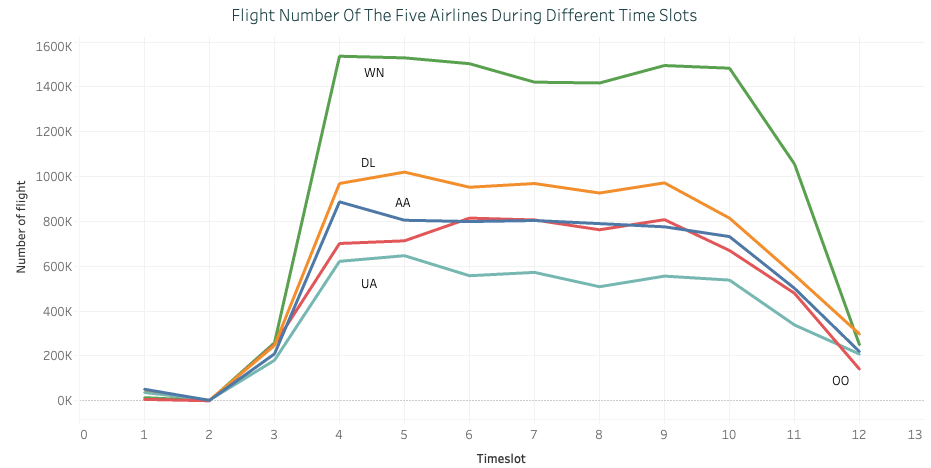

####**3.4.1 Results**
1. The peak hours appear in time slots from 5 to 10 mainly, which represents the time from 8:00 to 20:00, suggesting that all of the five airlines are busier during the daytime while the trough of flight amount appears mainly in the mid-night.


###3.5 Top 3 Popular Routes for Each Airlines

In [ ]:
%%bigquery --project ba775-team5
SELECT *
FROM(
    SELECT IATA_CODE, AIRLINE_NAME, FLIGHT_COUNT, ORIGIN, DESTINATION, ROW_NUMBER() OVER(PARTITION BY IATA_CODE ORDER BY FLIGHT_COUNT DESC) as flag
    FROM 
    (
        SELECT A.IATA_CODE, B.AIRLINE AS AIRLINE_NAME, COUNT(A.IATA_CODE) AS FLIGHT_COUNT, ORIGIN, DESTINATION
        FROM `ba775-team5.us_airlines.flights_all` AS A
        JOIN
        `ba775-team5.us_airlines.airlines` AS B
        ON
        A.IATA_CODE = B.IATA_CODE
        GROUP BY ORIGIN, DESTINATION, A.IATA_CODE, AIRLINE_NAME
        HAVING A.IATA_CODE IN ('DL', 'AA', 'UA', 'OO', 'WN')--Exactly the top 5 airlines mentioned previously.
    )
)
WHERE flag<=3

,IATA_CODE,AIRLINE_NAME,FLIGHT_COUNT,ORIGIN,DESTINATION,flag
0,AA,American Airlines Inc.,57504,DFW,LAX,1
1,AA,American Airlines Inc.,57502,LAX,DFW,2
2,AA,American Airlines Inc.,55994,DFW,ORD,3
3,OO,Skywest Airlines Inc.,56110,SAN,LAX,1
4,OO,Skywest Airlines Inc.,56100,LAX,SAN,2
5,OO,Skywest Airlines Inc.,33827,MKE,ORD,3
6,UA,United Air Lines Inc.,47840,SFO,LAX,1
7,UA,United Air Lines Inc.,47422,LAX,SFO,2
8,UA,United Air Lines Inc.,45793,SFO,ORD,3
9,WN,Southwest Airlines Co.,77054,HOU,DAL,1


####**3.5.1 Results**
1. In this section, we are evaluating the three most valuable flight routes for each of the five airlines to offer insights on flight route strategy. Results are shown in each of the forms displayed below and we can see that LGA,LAX,ORD are probably the three most popular routes start or end for the airlines, meaning that routes around such hubs are encouraged in the future.

## Part 4: Business Problems (Airports)

### 4.1 Top 5 Busiest Airports Last 10 years

In the first question of airports parts, we want to analyze the top five busiest airports in the United States. The following analysis will focus on these five airports.

In [ ]:
%%bigquery --project ba775-team5
SELECT Airports, CITY, COUNT(*) AS Number_of_flight
FROM (
    SELECT f1.ORIGIN AS Airports, a1.CITY
    FROM `ba775-team5.us_airlines.flights_all` AS f1
        JOIN `ba775-team5.us_airlines.airports` AS a1
        ON f1.ORIGIN = a1.IATA_CODE
    UNION ALL 
    SELECT f2.DESTINATION AS Airports, a2.CITY
    FROM `ba775-team5.us_airlines.flights_all` AS f2
        JOIN `ba775-team5.us_airlines.airports` AS a2
        ON f2.DESTINATION = a2.IATA_CODE
)
GROUP BY Airports, CITY
ORDER BY Number_of_flight DESC
LIMIT 5;

,Airports,CITY,Number_of_flight
0,ATL,Atlanta,7806532
1,ORD,Chicago,6002657
2,DFW,Dallas-Fort Worth,5092125
3,DEN,Denver,4601006
4,LAX,Los Angeles,4267091


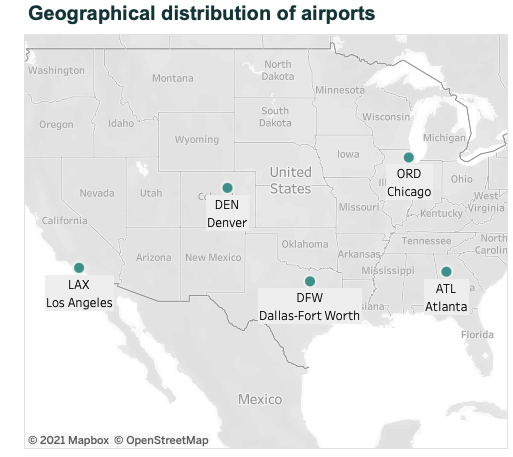

### 4.2 Top 5 Businest Airports' Average Departure_Delay


The target here is to calculate and analyze the average delay time of the 5 most popular cities. Considering passengers always pay more attention to departure time, we only take ORIGIN and DEPARTURE_TIME into consideration.
The result shows us that ORD - airport of Chicago owns the longest delay time of 36 minutes. This could give us and give airports a hint to rearrange their flights or improve their efficiency.


In [ ]:
%%bigquery --project ba775-team5
SELECT ORIGIN AS City, ROUND(AVG(DEPARTURE_DELAY), 3) AS Avg_delay
FROM `ba775-team5.us_airlines.flights_all`
WHERE ORIGIN IN ('ATL', 'ORD', 'DFW', 'DEN', 'LAX') AND DEPARTURE_DELAY > 0
GROUP BY ORIGIN
ORDER BY AVG(DEPARTURE_DELAY) DESC;

,City,Avg_delay
0,ORD,36.538
1,DFW,31.482
2,ATL,30.732
3,DEN,28.789
4,LAX,28.533


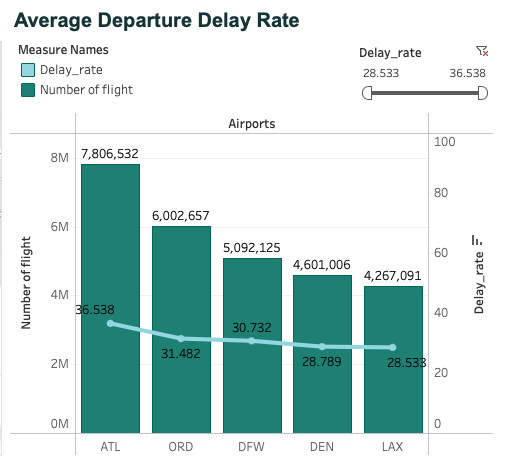

####**4.2.1 Results**
1. This visualization shows the number of flights according to the delay rate, which is proportional to the number of flights.
2. Next, we hope to look at the delay situation in different time dimensions and find out the problems of airport operation by comparing the data of these five airports.

###4.3 Top 5 Busiest Airports' Average Delay Rate (2 hrs Per Slot)

The target here is to calculate the avery delay time in each time period (every two hours) in the above 5 cities. So I divided the 24 hours into 12 groups. Then I used the number of delayed flights divided by the total number of flights which gave me the delay date for each time period.  The result is that every flight has a high delay rate in various time periods.


In [ ]:
%%bigquery --project ba775-team5

SELECT *, ROUND(delay_total/flight_total,4)*100 AS Delay_Rate
FROM 
(
    SELECT a.SCHEDULED_TIMESLOT, a.ORIGIN, COUNT(*) AS delay_total, flight_total
    FROM `ba775-team5.us_airlines.flights_all` AS a
    JOIN 
    (
        SELECT SCHEDULED_TIMESLOT, ORIGIN, COUNT(*) AS flight_total
        FROM `ba775-team5.us_airlines.flights_all`
        WHERE ORIGIN IN ('ATL', 'ORD', 'DFW', 'DEN', 'LAX')
        GROUP BY SCHEDULED_TIMESLOT, ORIGIN
    ) AS b ON a.ORIGIN=b.ORIGIN AND a.SCHEDULED_TIMESLOT=b.SCHEDULED_TIMESLOT
    WHERE a.ORIGIN IN ('ATL', 'ORD', 'DFW', 'DEN', 'LAX') AND a.DEPARTURE_DELAY>0
    GROUP BY SCHEDULED_TIMESLOT, ORIGIN, flight_total
)
ORDER BY ORIGIN DESC
LIMIT 10;

,SCHEDULED_TIMESLOT,ORIGIN,delay_total,flight_total,Delay_Rate
0,6,ORD,121880,333634,36.53
1,7,ORD,160244,410603,39.03
2,4,ORD,82283,312740,26.31
3,1,ORD,167,414,40.34
4,9,ORD,175624,378913,46.35
5,5,ORD,146760,442543,33.16
6,12,ORD,13098,33723,38.84
7,10,ORD,195219,398713,48.96
8,3,ORD,5340,22833,23.39
9,11,ORD,149081,325628,45.78


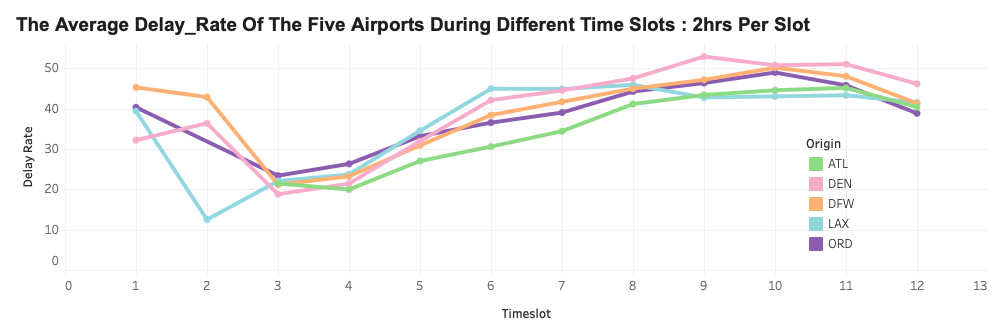

####**4.3.1 Results**
1. In 4.1, we know that the number of ATL flights is the largest, but the delay rate in the peak period from 16:00 to 22:00 is the lowest. Based on the data available, we think ALT is performing very well.
2. It can be seen from 4.1 that DEN Airport ranks the fourth in terms of flight volume, but its flight delay rate is nearly 5% higher than that of other airports during 16:00 to 18:00, which may indicate that there are problems in the operation of the airport during this time period.
3. The trend is similar for the other three airports, with no operational problems identified in the current data.
4. From the passenger's point of view, it is not only the rate of delay that matters, but also the length of delay. We'll continue to analyze delays to see how different airports perform.

###4.4 Top 5 Busiest Airports' Departure Delay Time During Different Time Slots (2 hrs Per Slot)



The target here is to calculate the delay time in each time period (every two hours) in the above 5 cities. Based on delay time, we want to find out if any airports have operational problems.


In [ ]:
%%bigquery --project ba775-team5
SELECT ORIGIN, ROUND(AVG(DEPARTURE_DELAY), 2) AS Avg_of_Delay, SCHEDULED_TIMESLOT
FROM `ba775-team5.us_airlines.flights_all` 
WHERE ORIGIN IN ('ATL', 'ORD', 'DFW', 'DEN', 'LAX')
    AND DEPARTURE_DELAY >0
GROUP BY ORIGIN, SCHEDULED_TIMESLOT
ORDER BY ORIGIN, SCHEDULED_TIMESLOT
LIMIT 10; -- Only for Preview

,ORIGIN,Avg_of_Delay,SCHEDULED_TIMESLOT
0,ATL,22.21,3
1,ATL,23.39,4
2,ATL,22.52,5
3,ATL,26.00,6
4,ATL,27.69,7
5,ATL,29.48,8
6,ATL,33.14,9
7,ATL,36.41,10
8,ATL,35.16,11
9,ATL,36.14,12


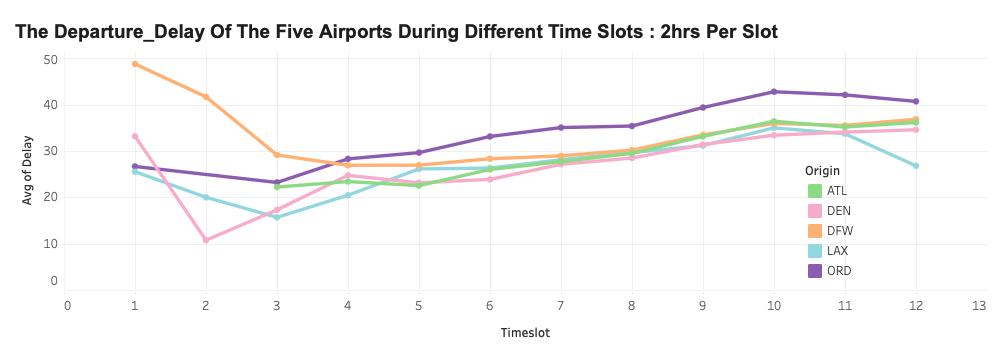

####**4.4.1 Results**
1. In the morning it is about 10 a.m. and at night at about 8 p.m. the average delay time for each airport will be stretched, which means during that time slot, the delay will be more likely to happen. Airports can re-coordinate the flights based on this information.
2. In 4.3, we see that ORD's delay rate trends are consistent with other airports, but the figure shows that its delay times are much higher than others airports.
3. Once a delay happened in ORD, it will take more time than other airports, which may also show that ORD has operational problems.

###4.5 Top 5 Busiest Airports' Average Delay Rate  (2 yrs Per Slot)

The target here is average delay time every two years in the above 5 cities. So there are 5 groups in total. Then i use total delay time divided by the total number of delay which gave me the  average delay time for each time period. The average delay time at each airport has not fluctuate much in 10 years, and has remained at about 10 minutes.


In [ ]:
%%bigquery --project ba775-team5
SELECT ORIGIN,ROUND(SUM(DEPARTURE_DELAY)/COUNT(DEPARTURE_DELAY> 0),2) AS DELAY_RATE, YEAR_PERIOD
FROM `ba775-team5.us_airlines.flights_all`
WHERE ORIGIN = 'ATL' OR ORIGIN = 'ORD'OR ORIGIN = 'DFW' OR ORIGIN = 'DEN' OR ORIGIN = 'LAX' 
GROUP BY ORIGIN,YEAR_PERIOD
order by ORIGIN,YEAR_PERIOD 
LIMIT 10; -- Only for Preview

,ORIGIN,DELAY_RATE,YEAR_PERIOD
0,ATL,10.51,1
1,ATL,8.16,2
2,ATL,9.84,3
3,ATL,8.78,4
4,ATL,9.88,5
5,DEN,8.83,1
6,DEN,9.60,2
7,DEN,13.99,3
8,DEN,10.25,4
9,DEN,9.58,5


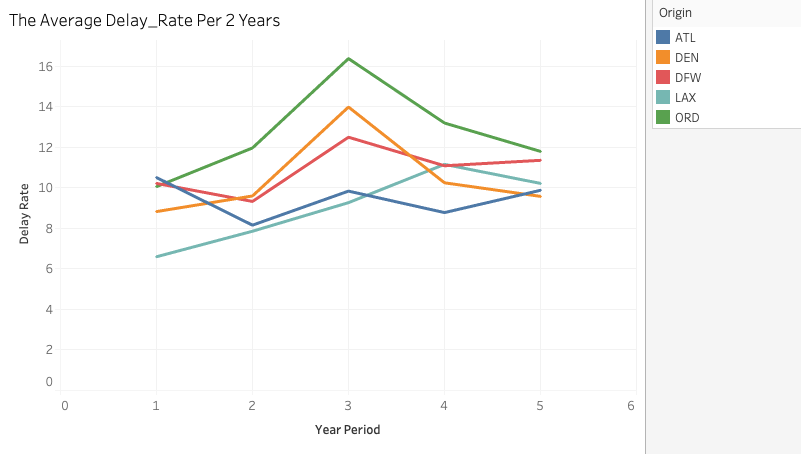

####**4.5.1 Results**
1. Through this comparison, we expect to see overall trends across the five airports. We can see that the overall delay rate is on the decline, and no airport is too special. Our main point is to find operational problems at airports, so the visualizations above will not appear in the dashboard.

### 4.6 Top 5 Busiest Airports' Delay Rate (Per Quater)

In this section, we will analyze the delay rates at these five airports on a quarterly basis, based on data from the past decade. We wanted to find the difference in the delay rate from quarter to quarter at each airport, and to compare whether there was a significant difference in the delay rate at each airport from quarter to quarter.

In [ ]:
%%bigquery --project ba775-team5
SELECT flight.ORIGIN, flight.Quarter, ROUND(Number_of_Delay/Number_of_flights, 4)*100 as Delay_rate
FROM 
(
    SELECT ORIGIN, EXTRACT(QUARTER FROM FLIGHT_DATE) AS Quarter, COUNT(*) AS Number_of_flights
    FROM `ba775-team5.us_airlines.flights_all`
    WHERE ORIGIN IN ('ATL', 'ORD', 'DFW', 'DEN', 'LAX')
    GROUP BY ORIGIN, Quarter
    ORDER BY Quarter 
) AS flight 
    JOIN
    (
        SELECT ORIGIN, EXTRACT(QUARTER FROM FLIGHT_DATE) AS Quarter, COUNT(*) AS Number_of_Delay
        FROM `ba775-team5.us_airlines.flights_all`
        WHERE ORIGIN IN ('ATL', 'ORD', 'DFW', 'DEN', 'LAX') AND DEPARTURE_DELAY > 0
        GROUP BY ORIGIN, Quarter
        ORDER BY Quarter 
    ) AS delay 
    ON (flight.ORIGIN = delay.ORIGIN) 
    AND flight.Quarter = delay.Quarter
ORDER BY Quarter, Delay_rate
LIMIT 10; -- Only for Preview

,ORIGIN,Quarter,Delay_rate
0,ATL,1,35.79
1,LAX,1,38.69
2,DFW,1,39.00
3,ORD,1,41.46
4,DEN,1,43.62
5,ATL,2,39.55
6,ORD,2,41.08
7,LAX,2,41.56
8,DFW,2,43.23
9,DEN,2,43.89


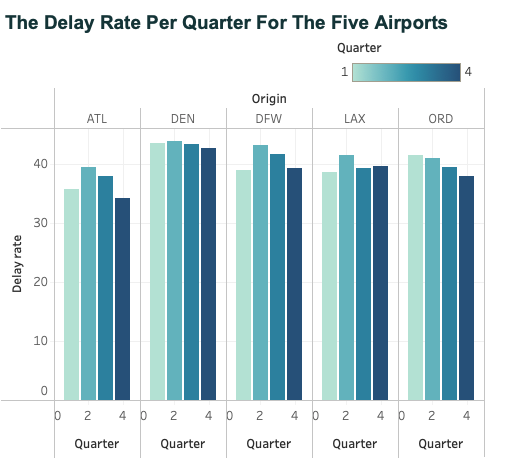

####**4.6.1 Results**
1. The delay rate of these five airports increased significantly in the second quarter. From the analysis of the number of flights mentioned above, it can be seen that this may be due to a large number of flights in the second quarter, which has a certain impact on the operation of airports. At the same time, Atlanta airport has the largest number of flights, but the delay rate is the lowest, which can show that Atlanta airport is relatively efficient in operation.
2. The number of flights in DEN is not the largest one, but the delay rate is the highest, which indicates that there may be operational problems in DEN.
3. Based on the above visualization, we can see that the delay rate varies from quarter to quarter, but DEN remains at the same level, and we have reason to believe that DEN can do better.


### 4.7 Top 5 Busiest Airports' Average Delay Time (Per Quarter) 

The target here is to calculate the average delay time per quarter for the five airports with the largest number of flights over the past decade. First, divide the FLIGHT_DATE into four quarters, then calculate the average of the DEPARTURE_DELAY results, and finally rank them in descending order. 


In [ ]:
%%bigquery --project ba775-team5
SELECT ORIGIN, EXTRACT(QUARTER FROM FLIGHT_DATE) AS Quarter, AVG(DEPARTURE_DELAY) AS Average_Delay_Time
FROM `ba775-team5.us_airlines.flights_all`
WHERE ORIGIN IN ('ATL', 'ORD', 'DFW', 'DEN', 'LAX') AND DEPARTURE_DELAY > 0
GROUP BY ORIGIN, Quarter
ORDER BY Quarter, Average_Delay_Time DESC
LIMIT 10; -- Only for Preview

,ORIGIN,Quarter,Average_Delay_Time
0,ORD,1,35.823068
1,ATL,1,30.003971
2,LAX,1,29.051085
3,DFW,1,28.769985
4,DEN,1,27.656717
5,ORD,2,39.232114
6,DFW,2,34.453878
7,ATL,2,32.804681
8,DEN,2,30.577665
9,LAX,2,28.425261


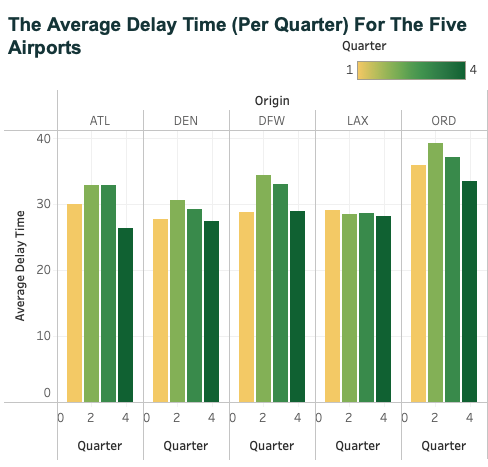

####**4.7.1 Results**
1. ORD had the highest average delay time in all four quarters. The airports with the fewest average delay time in q1 and Q4 were DEN and ATL respectively. 

2. LAX was the best performer, with the fewest average delay time in both the second and third quarters. But considering LAX's flight volume is the lowest of the bunch, it's no surprise.

3. We can see that several other airports have changed their delay times from season to season. But LAX has maintained roughly similar delay times each quarter, and there's reason to believe he can do better in Q1 and Q4.

4. ORD airport has a more serious problem in delay time. Based on 4.1 result, ORD is not the airport with the largest number of flights. This result can help the airport realize the possible causes of delay and optimize its own routes, airlines or airport services to avoid this problem in the future.

##Part 5: Conclusion

##5.1 Summary

1. To better understand the operational status of major U.S. airlines and airports, we first identify the Top 5 popular airlines as well as the Top 5 busiest airports. They are:
* Airlines: Delta Airlines(DL), American Airlines(AA), United Airlines(UA), Skywest Airlines(OO) and Southwest Airlines(WN).
* Airports: Atlanta(ATL), Chicago(ORD), Dallas-Fort Worth(DFW), Denver(DEN) and Los Angeles(LAX).
 
2. Regarding the analysis towards the airline section, we can see that  Delta Airlines, Southwest Airlines and American Airlines experienced a growth in flights volumn, which somehow results in their increasing rate of delay and cancelation. That could be a problem for them to solve.  
* Excluding objective factors such as weather, the main reason for flight delays is that the number of flights is overloaded, and the overall arrangement cannot be well arranged.
 
3. Regarding the analysis towards the airports section, we can see that the five main airports lie separately around America, which means that we don’t have geographical bias here.
* Looking at the number of delays and the delay ratio of each airport, we can find that Atlanta Airport has the largest number of flights and the lowest delay ratio, which shows that its operation is in good condition. This can be further confirmed by our analysis on the basis of different time slots.
* At the same time, from 2016 to 2018, Denver Airport ranked fourth in number of flights, but the delay rate was 5% higher than that of other airlines, which shows that there are problems with its operations. 
* So which time of the day is most likely to be delayed? Whether in terms of delay rate or delay time, it is slot9, which is 20-22 points. Therefore, we recommend that travelers and friends, if you are in a hurry, it is best to avoid this time period.
* From a quarterly point of view, the delay rate of Denver Airport and the delay time of Los Angeles Airport are relatively average throughout the four seasons. We can infer that it still has a relatively high delay rate in the off-season that this airport is in. Therefore, these two airports have low seasons‘ operational issues. On the whole, Quarter 2 has the highest delay rate, which may be related to people's travel preferences.


### 5.2 Dashboard

1. Business Problems Regarding Major Airlines: [Link](https://public.tableau.com/app/profile/weijia.suo/viz/USAirTransportOperationAnalysisFrom2009to2018Airlines_16303100520380/Dashboard1)
2. Business Problems Regarding Major Airports: [Link](https://public.tableau.com/app/profile/weijia.suo/viz/USAirTransportOperationAnalysisFrom2009to2018Airports_16303104428510/Dashboard1)

#### 5.2.1 Business Problems Regarding Major Airlines

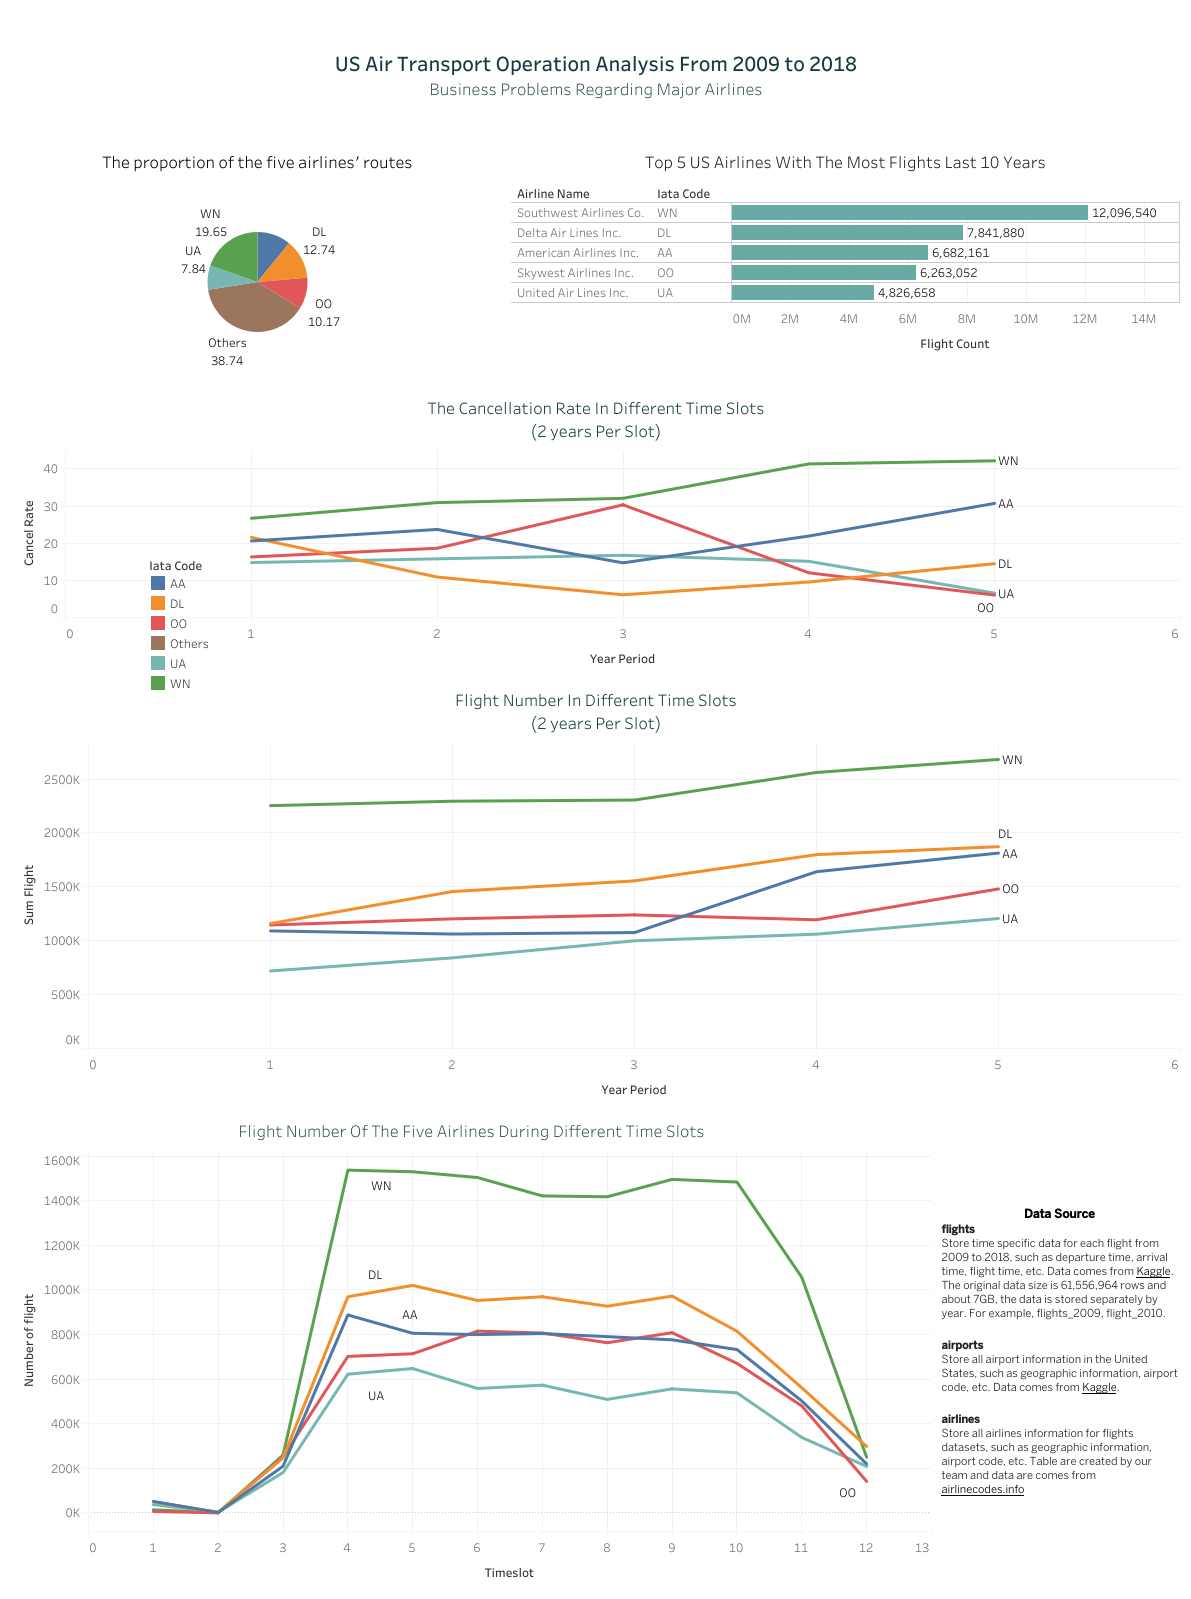

#### 5.2.2 Business Problems Regarding Major Airports

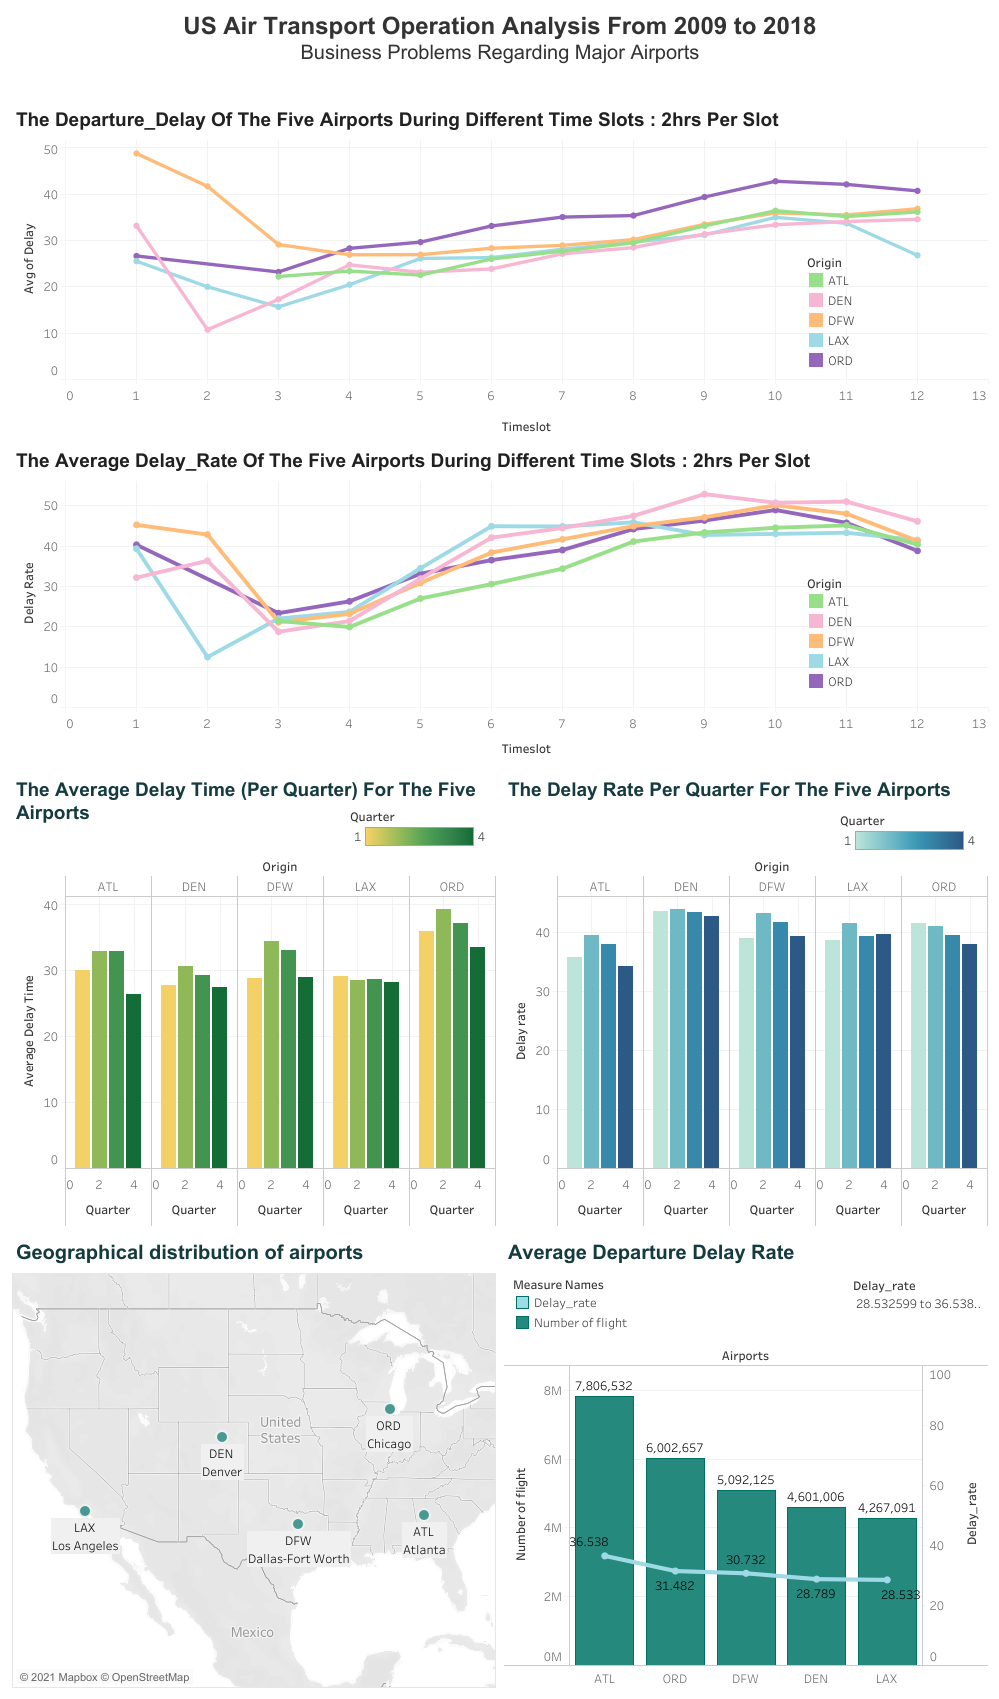